### Алгоритм Метрополиса-Гастингса для модели Эрдёша — Реньи

**Модель Эрдёша — Реньи**

Рассматриваются неориентированные графы без кратных ребер и петель.

Дано $V = {1,...,n}$ - множество вершины графа.

У графа существует не больше, чем $C^2_{n}$ потенциальных ребер.

$p \in (0,1)$ - вероятность появления ребра между $i$ и $j$ вершинами независимо от всех остальных $C^2_{n}-1$ пар вершин.

$E$ - случайное множество ребер графа. 

Таким образом, $G = (V,E)$ - случайный граф в модели Эрдеша – Реньи.

*А.М. Райгородский, Модели случайных графов и их применения, ТРУДЫ МФТИ. — 2010. — т. 2, № 4*

**Генерирование случайного графа с помощью матрицы смежности**

Граф задается матрицей смежности $A$ с элементами $A_{i,j}$ такими, что $A_{i,j} = 0$ или 1  зависимости от того, связаны вершины $i$ и $j$ или нет. Матрица смежности является симметричной (т.е. $A_{i,j}= A_{j,i}$) и имеет 0 на диагонали (т.е. $A_{i,i} = 0$). 

Модель случайного графа определяет распределение вероятностей по указанному набору возможных графов $\mathbb {G} = $ {$G$}, так что вероятность $P (G)$ конкретного графа $G$ пропорциональна $e^{H(G)}$ и имеет вид:

<center> $P(G) = \displaystyle \frac{e^{H(G)}}{Z}$
    
где $H (G) = \theta E(G)$. 

$\theta$ - параметр, связанный с вероятностью появления ребра $p$;

$ E(G) = \sum^n_{i = 1} \sum^n_{j =i+ 1}  A_{i,j}(G)$ - количество ребер графа $G$;

$Z = \sum_{G \in \mathbb {G}} \prod _{i=1}^{n} \prod _{i=1}^{n} e^{\theta A_{i,j}} = (1+e^{\theta})^{C^2_{n}}$

Из этого выражения можно вычислить свободную энергию:

$F = \ln{Z} =C^2_{n}\ln(1+e^{\theta}) $

Среднее количество ребер равно:

$\langle E \rangle =\displaystyle\frac{\partial F}{\partial \theta}=C^2_{n}\frac{e^{\theta}}{1+e^{\theta}}$

$\langle E \rangle =C^2_{n}p$

Тогда

$p =\displaystyle \frac{e^{\theta}}{1+e^{\theta}}$,

$\theta =\displaystyle \ln \frac {p}{1-p}$

**Алгоритм Метрополиса-Гастингса**

1) Создается простой граф с помощью матрицы смежности с заданным числом узлов $n$. Начальной конфигурацией может быть, например, граф без ребер.

2) Случайным образом выбирает матричный элемент, $A_{i,j}(G)$, который должен быть рассмотрен на предмет изменения.  Для случая, когда $A_{i,j}(G)=1$ ( $0$, соответственно), рассматривают удаление (добавление) ребра, то есть $A_{i,j} (G ') = 0$ ( $1$, соответственно). 

3) Считаем константу Метрополиса:

<center> $A(G,G') = \min\{1, \displaystyle\frac{e^{\theta E(G')}}{e^{\theta E(G)}}\}= \min\{1, e^{\theta(E(G')-E(G))} \}= \min\{1, e^{\Delta H} \}$
    
Так как претендент на новую конфигурацию графа отличается от графа на одно ребро, $\Delta H = \pm \theta$.

4) Проверяем условие принятия

*Agata Fronczak, “Exponential random graph models”, Encyclopedia of Social Network Analysis and Mining - 2012.*

In [1]:
import math
import numpy as np
import random
import copy

In [2]:
# Параметры модели Эрдеша-Реньи

four_edges_count = 0  # счетчик графов с 4 ребрами
n = 10  # число вершин
ed = []  # ребра графа
nd = range(n) # вершины графа
edges_count = 0  # счетчик ребер графа
p = 0.3  # вероятность появления ребра между любыми двумя вершинами графа
theta = math.log(p/(1-p))  # параметр модели

In [3]:
# Алгоритм Метрополиса-Гастингса

Graph = [[0] * n for i in range(n)]  # матрица смежности начального графа

N = 170000  # число реализаций

for t in range(N):
    newGraph = copy.deepcopy(Graph)
    
    # выбор двух вершин графа
    i1 = random.randrange(n-1) 
    j1 = random.randrange(i1+1,n)
    lst_eg = (i1,j1)  # ребро между данными вершинами

    # генерируем претендента на следующий граф
    if newGraph[i1][j1]:
        newGraph[i1][j1]=0
        newGraph[j1][i1]=0
        A = min(1, math.exp(-theta))  # константа Метрополиса
        delta = -1  # изменение в количестве ребер графа
    else:
        newGraph[i1][j1]=1
        newGraph[j1][i1]=1
        A = min(1, math.exp(theta))  # константа Метрополиса 
        delta = 1  # изменение в количестве ребер графа
    
    # проверка условия принятия
    U = random.uniform(0,1)
    if U <= A:  
        Graph[i1][j1]=newGraph[i1][j1]
        Graph[j1][i1]=newGraph[j1][i1]
        edges_count += delta
        if lst_eg in ed:
            ed.remove(lst_eg) # удаление ребра из списка ребер
        else:
            ed.append(lst_eg) # добавление ребра в список ребер
    if edges_count == 4:
        four_edges_count += 1

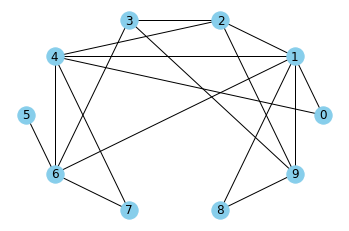

In [6]:
# Визуализация последнего полученного графа

import warnings
warnings.filterwarnings("ignore", category=UserWarning)
import networkx as nx
import matplotlib.pyplot as plt

def Gr(ed):
    G = nx.Graph()
    G.add_nodes_from(nd)
    G.add_edges_from(ed)

    pos = nx.circular_layout(G)
    nx.draw_networkx_nodes(G, pos, node_color = 'skyblue')
    nx.draw_networkx_labels(G, pos)
    nx.draw_networkx_edges(G, pos)
    plt.axis('off')
    plt.show()
Gr(ed)

#### Оценка доли графов с четырьмя ребрами

In [5]:
print('Доля графов, содердащих ровно 4 ребра:',four_edges_count/N)

Доля графов, содердащих ровно 4 ребра: 0.0005294117647058823


In [7]:
from sympy import binomial

C = binomial(10, 2)  # число всевозможных ребер
print('Теоретическая оценка:',binomial(C, 4)*(p**4*(1-p)**(C-4)))

Теоретическая оценка: 0.000537868801204544


Таким образом, полученная оценка примерно равна теоретической.